# Import packages

In [66]:
# !pip install -r multiff_analysis/requirements.txt

In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys

project_folder = '/Users/dusiyi/Documents/Multifirefly-Project'
os.chdir(project_folder)
sys.path.append(os.path.join(project_folder, 'multiff_analysis', 'methods'))

from data_wrangling import general_utils, specific_utils, process_monkey_information
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization.matplotlib_tools import plot_behaviors_utils
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, ml_decoder_class, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class, cca_utils, cca_cv_utils
from neural_data_analysis.neural_analysis_tools.cca_methods.cca_plotting import cca_plotting, cca_plot_lag_vs_no_lag, cca_plot_cv
from neural_data_analysis.neural_analysis_by_topic.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.neural_analysis_by_topic.planning_and_neural import planning_neural_class, planning_neural_utils
from neural_data_analysis.neural_analysis_by_topic.decode_targets import behav_features_to_keep, target_decoder_class, prep_target_decoder
from neural_data_analysis.neural_analysis_tools.gpfa_methods import elephant_utils, fit_gpfa_utils, gpfa_regression_utils, plot_gpfa_utils, gpfa_tuning, gpfa_helper_class
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils

import sys
import math
import gc
import subprocess
from pathlib import Path

# Third-party imports
import numpy as np
from numpy import var
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy import linalg, interpolate
from scipy.signal import fftconvolve
from scipy.io import loadmat
from scipy import sparse
import torch
from numpy import pi
import cProfile
import pstats

# Machine Learning imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.multivariate.cancorr import CanCorr

# Neuroscience specific imports
import neo
import rcca

# To fit gpfa
import numpy as np
from importlib import reload
from scipy.integrate import odeint
import quantities as pq
import neo
from elephant.spike_train_generation import inhomogeneous_poisson_process
from elephant.gpfa import GPFA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from elephant.gpfa import gpfa_core, gpfa_util




plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)


%load_ext autoreload
%autoreload 2

done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get data

In [3]:
#raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0416"
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"
dec = target_decoder_class.TargetDecoderClass(raw_data_folder_path=raw_data_folder_path,
                                                               bin_width=0.02, window_width=0.05)

In [5]:
exists_ok = True
dec.streamline_making_behav_and_neural_data(exists_ok=exists_ok)
dec.get_x_and_y_var(exists_ok=exists_ok)
dec.get_x_and_y_data_for_modeling(exists_ok=exists_ok)
# dec._free_up_memory()
print('x_var.shape:', dec.x_var.shape)
print('y_var_reduced.shape:', dec.y_var_reduced.shape)

print('x_var_lags.shape:', dec.x_var_lags.shape)
print('y_var_lags_reduced.shape:', dec.y_var_lags_reduced.shape)

dec.prepare_spikes_for_gpfa(align_at_beginning=False)


Retrieved target_df
Loaded behav_data_all from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/behav_data_all.csv
Loaded single_vis_target_df from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/single_vis_target_df.csv
33817 rows of 179921 rows (18.8%) of behav_data_all are preserved after taking out chunks between target last-seen time and capture time
0 segments (0.0%) out of 781 segments have 0 duration. They are dropped from pursuit data

No NA values found in pursuit_data
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Bruno/data_0328/binned_spikes_df_0p02.csv
Loaded x_var from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_x_var.csv
Loaded y_var from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_y_var.csv
Getting y_var_reduced...
Loaded y_var_reduced from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_y_var_reduced.csv
Loaded x_var_lags and y_var_lags from all_monkey_d

In [7]:
dec.y_var_reduced.columns

Index(['monkey_speed', 'monkey_angle', 'monkey_dw', 'monkey_ddw', 'monkey_ddv',
       'whether_new_distinct_stop', 'delta_distance',
       'monkey_y_target_last_seen', 'LDz', 'RDy', 'gaze_mky_view_angle_l',
       'gaze_mky_view_y_r', 'eye_world_speed', 'num_visible_ff',
       'min_abs_ff_angle_boundary', 'min_visible_ff_distance',
       'min_abs_visible_ff_angle', 'catching_ff', 'any_ff_visible',
       'target_angle', 'target_angle_to_boundary', 'target_rel_x',
       'target_rel_y', 'time_since_target_last_seen', 'target_last_seen_angle',
       'time_since_last_capture', 'traj_curv', 'target_opt_arc_dheading',
       'cum_distance_since_target_last_seen',
       'd_heading_since_target_last_seen', 'time', 'gaze_world_y_l',
       'target_x', 'segment_start_dummy', 'segment_end_dummy'],
      dtype='object')

In [ ]:
stop !

# GPFA

## get data and fit gpfa

In [7]:
dec.get_gpfa_traj(latent_dimensionality=10)

175
15
1


In [ ]:
# # manually save the trajectories (this will be done in class henceforward)

# alignment = 'segStart' if dec.align_at_beginning else 'segEnd'
# file_name = f'gpfa_neural_aligned_{alignment}_d{10}.pkl'

# trajectories_path = os.path.join(
#             dec.decoding_targets_folder_path, file_name)

# with open(trajectories_path, 'wb') as f:
#     pickle.dump(dec.trajectories, f)
# print(f'Saved GPFA trajectories to {trajectories_path}')

## plot latent dimensions

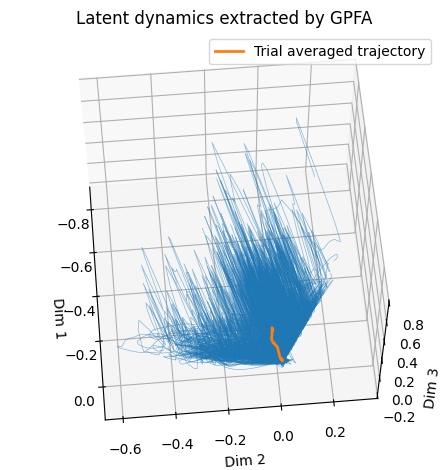

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: title={'center': 'Latent dynamics extracted by GPFA'}, xlabel='Dim 1', ylabel='Dim 2', zlabel='Dim 3'>)

In [37]:
plot_gpfa_utils.plot_gpfa_traj_3d_uniform_color(dec.trajectories)


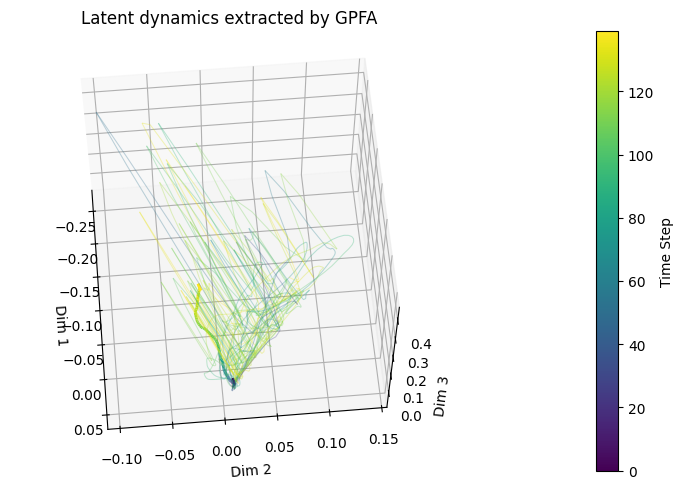

In [26]:
# First, enable interactive mode in your notebook
%matplotlib inline

# Import required modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create the interactive plot
fig, ax = plot_gpfa_utils.plot_gpfa_traj_3d(
    trajectories=dec.trajectories,
    figsize=(15, 5),
    linewidth_single_trial=0.75,
    alpha_single_trial=0.3,
    linewidth_trial_average=2,
    title='Latent dynamics extracted by GPFA',
    view_azim=-5,
    view_elev=60
)

plt.show()

In [ ]:
# fig = plot_gpfa_utils.plot_gpfa_traj_3d_plotly(trajectories)

In [27]:
# Find variance explained by each latent dimension
traj_stack = np.stack(dec.trajectories, axis=0)  # shape: (n_trials, 3, T)
var_by_dim = var(traj_stack, axis=(0, 2))    # variance across trials and time
var_by_dim /= var_by_dim.sum()               # normalize to get explained variance ratio
print("Variance explained by each latent dimension:", var_by_dim)


Variance explained by each latent dimension: [0.38133 0.28006 0.12792 0.06138 0.0622  0.03551 0.02254 0.0138  0.00877
 0.00649]


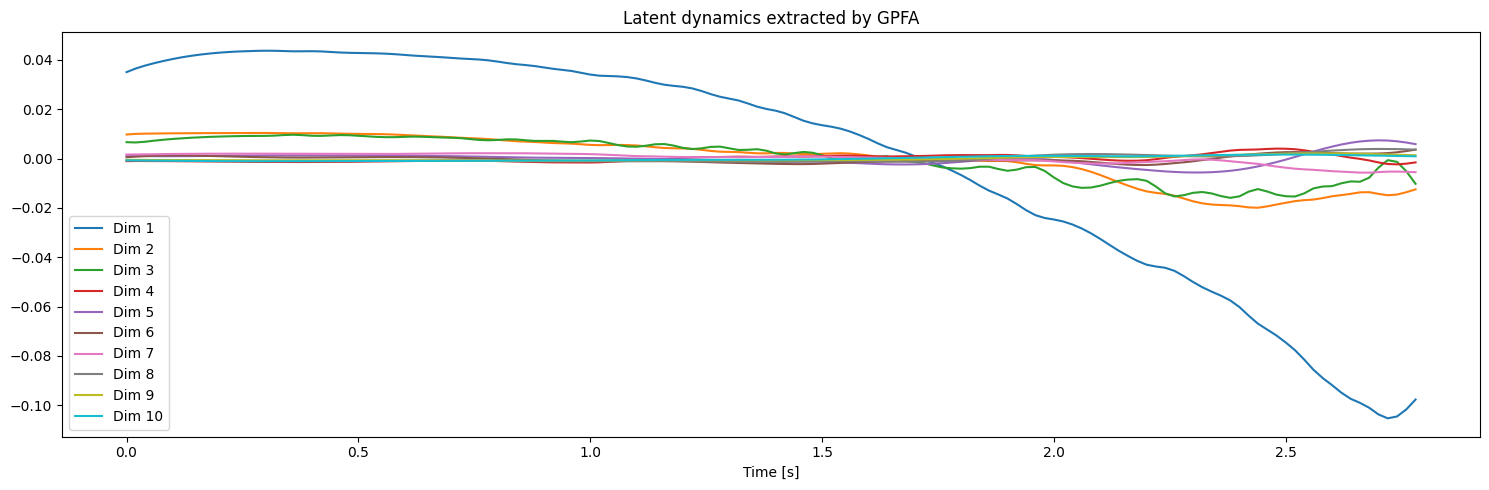

In [38]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 5))

ax.set_title('Latent dynamics extracted by GPFA')
ax.set_xlabel('Time [s]')

average_trajectory = np.mean(dec.trajectories, axis=0)
time = np.arange(len(average_trajectory[0])) * 0.02  # assuming all trajectories have the same length

for i, x in enumerate(average_trajectory):
    ax.plot(time, x, label=f'Dim {i+1}')

ax.legend()

plt.tight_layout()
plt.show()


## regression

In [ ]:
dec.get_trialwise_gpfa_and_behav_data(use_raw_spike_data_instead=True,
                                            apply_pca_on_raw_spike_data=True,
                                               use_lagged_raw_spike_data=True,) 
print('dec.behav_trials[5].shape:', dec.behav_trials[5].shape)
print('dec.gpfa_neural_trials[5].shape:', dec.gpfa_neural_trials[5].shape)

In [ ]:
max_timepoints = int(1.5/0.02)
scores_by_time, times = gpfa_regression_utils.run_time_resolved_regression_variable_length_trials(dec.gpfa_neural_trials, dec.behav_trials, time_step=0.02, cv_folds=5, max_timepoints=max_timepoints,
                                                                                                  align_at_beginning=True)
scores_by_time_df = pd.DataFrame(scores_by_time, columns=dec.gpfa_behav_data_columns) 
gpfa_regression_utils.plot_time_resolved_scores(scores_by_time, times, behavior_labels=scores_by_time_df.columns)

Timepoints: 100%|██████████| 75/75 [00:15<00:00,  4.93it/s]


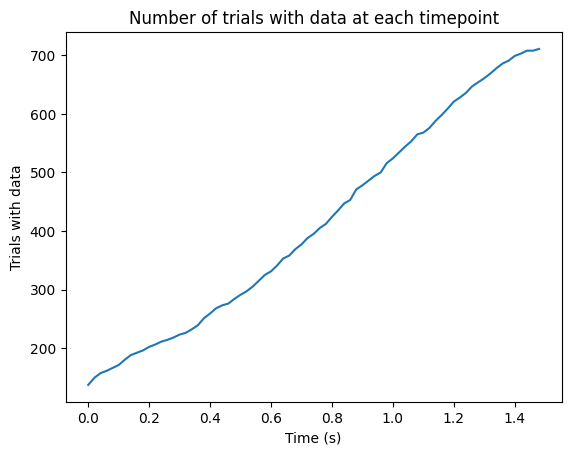

In [57]:
gpfa_regression_utils.plot_trial_counts_by_timepoint(dec.gpfa_neural_trials, times, align_at_beginning=dec.align_at_beginning)  # 

## why poor performance?

In [ ]:
import neural_data_analysis.neural_analysis_tools.gpfa_methods.gpfa_regression_utils as gpfa_regression_utils

# 1. Print number of trials per timepoint
gpfa_regression_utils.print_trials_per_timepoint(dec.gpfa_neural_trials)

# 2. Check for NaNs
gpfa_regression_utils.check_for_nans_in_trials(dec.gpfa_neural_trials, name='latent')
gpfa_regression_utils.check_for_nans_in_trials(dec.behav_trials, name='behavioral')

# 3. Standardize trials
latent_trials_std = gpfa_regression_utils.standardize_trials(dec.gpfa_neural_trials)
behav_trials_std = gpfa_regression_utils.standardize_trials(dec.behav_trials)

# 4. Plot latent and behavioral variables for a few trials
gpfa_regression_utils.plot_latents_and_behav_trials(latent_trials_std, behav_trials_std, n_trials=5)


## hyperparams (still need to debug)

In [ ]:
# grid search

import itertools
from joblib import Parallel, delayed, cpu_count
print(f"Detected CPU cores: {cpu_count()}")

# # can add for smoothing:
# # other forms of smoothing like (currently it's only uniform_filter1d)
# from scipy.ndimage import gaussian_filter1d
# # gpfa_neural_trials: list of trials, each trial shape (time_bins, n_neurons)
# smoothed_trials = [
#     gaussian_filter1d(trial, sigma=smooth_sigma, axis=0)
#     for trial in gpfa_neural_trials
# ]


# Define your grid
smoothing_windows = [1, 3]
use_sqrt = [True, False]
gpfa_dims = [3, 5]
bin_widths = [0.02]
ridge_alphas = [0.1, 1]
regression_types = ['ridge']
align_at_beginning_opts = [True]
pca_components = [5, 10]

param_grid_gpfa = list(itertools.product(
    smoothing_windows, use_sqrt, gpfa_dims, bin_widths, ridge_alphas, regression_types, align_at_beginning_opts
))

# Baseline configs
param_grid_raw = list(itertools.product(
    smoothing_windows, use_sqrt, bin_widths, ridge_alphas, regression_types, align_at_beginning_opts
))
param_grid_pca = list(itertools.product(
    smoothing_windows, use_sqrt, bin_widths, ridge_alphas, regression_types, align_at_beginning_opts, pca_components
))

# Run GPFA grid
results_gpfa = Parallel(n_jobs=-1, verbose=10)(
    delayed(gpfa_tuning.run_gpfa_experiment_time_resolved)(
        dec, smoothing, sqrt, gpfa_dim, bin_width, ridge_alpha, regression_type, align_at_beginning, baseline=None
    )
    for (smoothing, sqrt, gpfa_dim, bin_width, ridge_alpha, regression_type, align_at_beginning) in param_grid_gpfa
)

# Run raw baseline grid
results_raw = Parallel(n_jobs=-1, verbose=10)(
    delayed(gpfa_tuning.run_gpfa_experiment_time_resolved)(
        dec, smoothing, sqrt, None, bin_width, ridge_alpha, regression_type, align_at_beginning, baseline='raw'
    )
    for (smoothing, sqrt, bin_width, ridge_alpha, regression_type, align_at_beginning) in param_grid_raw
)

# Run PCA baseline grid
results_pca = Parallel(n_jobs=-1, verbose=10)(
    delayed(gpfa_tuning.run_gpfa_experiment_time_resolved)(
        dec, smoothing, sqrt, None, bin_width, ridge_alpha, regression_type, align_at_beginning, baseline='pca', pca_components=pca_comp
    )
    for (smoothing, sqrt, bin_width, ridge_alpha, regression_type, align_at_beginning, pca_comp) in param_grid_pca
)

# Combine all results
all_results = results_gpfa + results_raw + results_pca
df = pd.DataFrame(all_results)
print(df.sort_values('mean_r2', ascending=False).head(10))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/eye_position_analysis/neural_data_analysis/gpfa_methods/gpfa_tuning.py:65: RuntimeWarning: invalid value encountered in sqrt
  neural_trials = [np.sqrt(trial) for trial in neural_trials]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py

Computing GPFA trajectories with 3 dimensions...


python3.11/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/ut

Computing GPFA trajectories with 3 dimensions...


klearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1101: Runti

Computing GPFA trajectories with 5 dimensions...


/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/eye_position_analysis/neural_data_analysis/gpfa_methods/gpfa_tuning.py:65: RuntimeWarning: invalid value encountered in sqrt
  neural_trials = [np.sqrt(trial) for trial in neural_trials]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = 

Computing GPFA trajectories with 5 dimensions...
Initializing parameters using factor analysis...


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
best = df.iloc[df['mean_r2'].idxmax()]
plt.plot(best['times'], np.nanmean(np.array(best['r2_by_time']), axis=1))
plt.xlabel('Time (s)')
plt.ylabel('Mean R²')
plt.title(f"Best config: {best['model']} R² by time")
plt.show()

# Compare models
import seaborn as sns
sns.catplot(data=df, x='model', y='mean_r2', kind='bar')

## try concatenate data

In [92]:
dec.get_concatenated_gpfa_and_behav_data_for_all_trials(use_lagged_behav_data=False,
                                                            use_raw_spike_data_instead=True,
                                                            use_lagged_raw_spike_data=False,
                                                            apply_pca_on_raw_spike_data=False,
                                                            num_pca_components=7)

print(dec.concat_neural_trials.shape)
print(dec.concat_behav_trials.shape)

(8476, 22)
(8476, 36)


In [ ]:
# Multivariate linear regression
dec.y_var_lr_df = neural_data_modeling.get_y_var_lr_df(
                dec.concat_neural_trials, dec.concat_behav_trials)

In [61]:
# use_raw_spike_data_instead=True,
# use_lagged_raw_spike_data=True,
# apply_pca_on_raw_spike_data=True,
dec.y_var_lr_df.head(7)

,var,r,r_squared,p_values
28,cum_distance_since_target_last_seen,0.23559,0.05550,0.00000
11,gaze_mky_view_y_r,0.19013,0.03615,0.00000
22,target_rel_y,0.18519,0.03430,0.00000
4,monkey_ddv,0.17870,0.03193,0.00000
25,time_since_last_capture,0.17629,0.03108,0.00000
30,time,0.14750,0.02175,0.00000
35,segment,0.14729,0.02170,0.00000


In [78]:
# use_raw_spike_data_instead = True
dec.y_var_lr_df.head(7)

,var,r,r_squared,p_values
28,cum_distance_since_target_last_seen,0.10508,0.01104,0.00000
11,gaze_mky_view_y_r,0.10235,0.01048,0.00000
22,target_rel_y,0.10140,0.01028,0.00000
35,segment,0.08821,0.00778,0.00000
30,time,0.08745,0.00765,0.00000
8,LDz,0.08435,0.00711,0.00000
25,time_since_last_capture,0.07941,0.00631,0.00000


In [54]:
# use_raw_spike_data_instead=True,
# use_lagged_raw_spike_data=True,

dec.y_var_lr_df.head(7)

,var,r,r_squared,p_values
28,cum_distance_since_target_last_seen,0.29333,0.08604,0.00000
11,gaze_mky_view_y_r,0.28532,0.08141,0.00000
22,target_rel_y,0.27928,0.07800,0.00000
35,segment,0.27215,0.07407,0.00000
30,time,0.26929,0.07252,0.00000
4,monkey_ddv,0.22830,0.05212,0.00000
8,LDz,0.22211,0.04933,0.00000


In [74]:
# use_raw_spike_data_instead = False
dec.y_var_lr_df.head(20)

,var,r,r_squared,p_values
28,cum_distance_since_target_last_seen,0.39428,0.15546,0.00000
23,time_since_target_last_seen,0.27623,0.07630,0.00000
22,target_rel_y,0.27174,0.07384,0.00000
25,time_since_last_capture,0.26267,0.06900,0.00000
11,gaze_mky_view_y_r,0.25881,0.06698,0.00000
30,time,0.21572,0.04654,0.00000
35,segment,0.21570,0.04653,0.00000
4,monkey_ddv,0.20913,0.04374,0.00000
16,min_abs_visible_ff_angle,0.18417,0.03392,0.00000
10,gaze_mky_view_angle_l,0.18047,0.03257,0.00000


# ML to decode single vars

## decode

In [93]:
# neural_data = dec.x_var_lags
# behavioral_data = dec.y_var_reduced

neural_data = dec.concat_neural_trials
behavioral_data = dec.concat_behav_trials

Performing ML-based decoding for variable: target_rel_y
Training and evaluating rf using 5 folds
Training and evaluating nn using 5 folds
Training and evaluating lr using 5 folds

ML DECODING SUMMARY

RF:
  CV R²: -0.0002 ± 0.0062
  Train R²: 0.0173
  Test R²: 0.0046

NN:
  CV R²: -0.0695 ± 0.1472
  Train R²: 0.0154
  Test R²: 0.0106

LR:
  CV R²: 0.0050 ± 0.0050
  Train R²: 0.0107
  Test R²: 0.0045

Performing ML-based decoding for variable: target_rel_x
Training and evaluating rf using 5 folds
Training and evaluating nn using 5 folds
Training and evaluating lr using 5 folds

ML DECODING SUMMARY

RF:
  CV R²: -0.0039 ± 0.0051
  Train R²: 0.0093
  Test R²: -0.0101

NN:
  CV R²: -0.0047 ± 0.0044
  Train R²: 0.0075
  Test R²: -0.0082

LR:
  CV R²: -0.0020 ± 0.0032
  Train R²: 0.0036
  Test R²: -0.0031



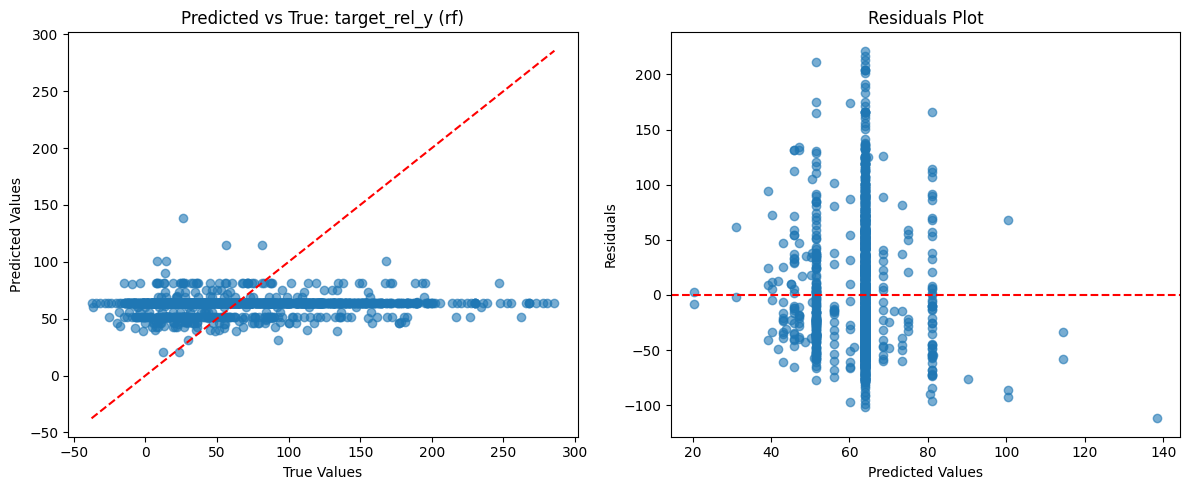

In [94]:
# General usage for any behavioral variable
decoder = ml_decoder_class.MLBehavioralDecoder()
models_to_use=['rf', 'nn', 'lr']
successful_decodings = {}

for var in ['target_rel_y', 'target_rel_x']:
    result = decoder.decode_variable(neural_data, behavioral_data, var, models_to_use=models_to_use)
    if result is not None:
        successful_decodings[var] = result

best_model, best_results = decoder.get_best_model('target_rel_y', 'test_r2')

# Plot rf results for any variable
decoder.plot_ml_results('target_rel_y', 'rf')

successful_decodings

## compare different Models

Let's compare the performance of different machine learning models.


Model Performance Comparison:
Target Variable Model         CV Score Test Score Score Type
   target_angle    RF -0.0143 ± 0.0053    -0.0127         R²
   target_angle    LR -0.0003 ± 0.0009     0.0007         R²
       target_x    RF -0.0070 ± 0.0001    -0.0037         R²
       target_x    LR  0.0000 ± 0.0013     0.0015         R²
   target_rel_x    RF -0.0050 ± 0.0019    -0.0032         R²
   target_rel_x    LR  0.0023 ± 0.0009     0.0025         R²


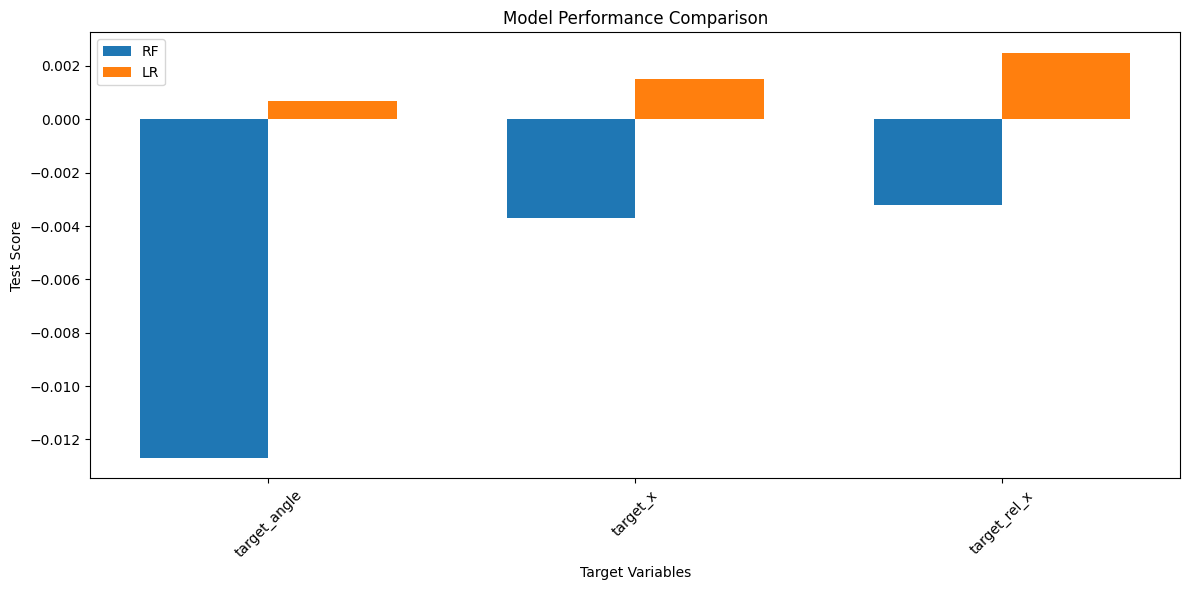

In [ ]:
comparison_df = eval_target_decoder.compare_models(successful_decodings)

## plot feature importance for RF

In [ ]:
# Analyze feature importance for Random Forest models
for target_var in successful_decodings.keys():
    if 'rf' in successful_decodings[target_var]:
        print(f"\n{'='*50}")
        print(f"FEATURE IMPORTANCE: {target_var}")
        print('='*50)
        
        rf_model = successful_decodings[target_var]['rf']['model']
        
        if hasattr(rf_model, 'feature_importances_'):
            # Get feature importance
            importance_df = regression_utils._get_rf_feature_importances(rf_model, dec.neural_data.columns)
            # Show top 10 most important features
            print(f"Top 10 most important neurons for {target_var}:")
            print(importance_df.head(10))
            
            # Plot feature importance
            regression_utils.plot_feature_importance(importance_df, target_var)


# Save Results (have yet to try)

Finally, let's save our results for future analysis.


In [ ]:
import pickle
import json
import pandas as pd
from typing import Dict, Any

def create_experiment_info(decoder, monkey: str, session: str) -> Dict[str, Any]:
    """Create experiment information dictionary."""
    return {
        'monkey': monkey,
        'session': session,
        'bin_width': decoder.bin_width,
        'window_width': decoder.window_width,
        'neural_data_shape': decoder.neural_data.shape,
        'target_data_shape': decoder.target_data.shape
    }

def create_cca_results(decoder) -> Dict[str, Any]:
    """Create CCA results summary."""
    return {
        'top_3_correlations': (
            decoder.results['cca']['canonical_correlations'][:3].tolist() 
            if 'cca' in decoder.results else None
        )
    }

def find_best_performances(successful_decodings: Dict) -> Dict[str, Dict[str, Any]]:
    """Find best performing model for each target variable."""
    best_performances = {}
    for target_var, models in successful_decodings.items():
        best_model = None
        best_score = -1
        
        for model_name, results in models.items():
            score = results.get('test_r2', results.get('test_accuracy', results.get('cv_mean', 0)))
            if score > best_score:
                best_score = score
                best_model = model_name
        
        best_performances[target_var] = {
            'best_model': best_model,
            'best_score': best_score
        }
    return best_performances

def create_summary_report(decoder, successful_decodings: Dict, monkey: str, session: str) -> Dict[str, Any]:
    """Create complete summary report."""
    return {
        'experiment_info': create_experiment_info(decoder, monkey, session),
        'cca_results': create_cca_results(decoder),
        'ml_results_summary': {
            'successful_targets': list(successful_decodings.keys()),
            'best_performances': find_best_performances(successful_decodings)
        }
    }

def print_summary_report(summary_report: Dict[str, Any]):
    """Print formatted summary report."""
    print("\nEXPERIMENT SUMMARY")
    print("="*50)
    print(f"Neural data shape: {summary_report['experiment_info']['neural_data_shape']}")
    print(f"Target data shape: {summary_report['experiment_info']['target_data_shape']}")
    
    if summary_report['cca_results']['top_3_correlations']:
        print(f"Top 3 CCA correlations: {summary_report['cca_results']['top_3_correlations']}")
    
    print(f"Successfully decoded targets: {summary_report['ml_results_summary']['successful_targets']}")
    
    print("\nBest model performance for each target:")
    for target, perf in summary_report['ml_results_summary']['best_performances'].items():
        print(f"  {target}: {perf['best_model']} (score: {perf['best_score']:.4f})")

def save_experiment_results(decoder, successful_decodings: Dict, monkey: str, session: str, 
                          base_filename: str = None):
    """Save both detailed results and summary report."""
    if base_filename is None:
        base_filename = f"target_decoding_results_{monkey}_{session}"
    
    pkl_filename = f"{base_filename}.pkl"
    json_filename = f"{base_filename}_summary.json"
    
    # Save detailed results
    print("Saving results...")
    decoder.save_results(pkl_filename)
    
    # Create and save summary report
    summary_report = create_summary_report(decoder, successful_decodings, monkey, session)
    print_summary_report(summary_report)
    
    with open(json_filename, 'w') as f:
        json.dump(summary_report, f, indent=2)
    
    print(f"\nResults saved to: {pkl_filename}")
    print(f"Summary saved to: {json_filename}")
    
    return pkl_filename, json_filename

def load_experiment_results(base_filename: str = None, monkey: str = None, session: str = None):
    """Load both detailed results and summary report."""
    if base_filename is None:
        if monkey and session:
            base_filename = f"target_decoding_results_{monkey}_{session}"
        else:
            raise ValueError("Must provide either base_filename or both monkey and session")
    
    pkl_filename = f"{base_filename}.pkl"
    json_filename = f"{base_filename}_summary.json"
    
    try:
        # Load detailed results
        with open(pkl_filename, 'rb') as f:
            decoder_results = pickle.load(f)
        
        # Load summary report
        with open(json_filename, 'r') as f:
            summary_report = json.load(f)
        
        print(f"Loaded results from: {pkl_filename}")
        print(f"Loaded summary from: {json_filename}")
        
        return decoder_results, summary_report
        
    except FileNotFoundError as e:
        print(f"File not found: {e}")
        return None, None
    except Exception as e:
        print(f"Error loading results: {e}")
        return None, None

# --- Usage Examples ---

# Saving (replaces your original code):
# save_experiment_results(decoder, successful_decodings, 'Bruno', 'data_0328')

# Loading:
# decoder_results, summary_report = load_experiment_results(monkey='Bruno', session='data_0328')
# OR
# decoder_results, summary_report = load_experiment_results(base_filename="target_decoding_results_bruno_0328")

# If you want to print the loaded summary:
# if summary_report:
#     print_summary_report(summary_report)

## save

In [ ]:
# Save everything with one function call
save_experiment_results(decoder, successful_decodings, 'Bruno', 'data_0328')

## retrieve

In [ ]:

# Load everything with one function call
decoder_results, summary_report = load_experiment_results(monkey='Bruno', session='data_0328')
## OR
# decoder_results, summary_report = load_experiment_results(base_filename="target_decoding_results_bruno_0328")

# If you want to print the loaded summary:
if summary_report:
    print_summary_report(summary_report)

# Access successful_decodings
if decoder_results and 'successful_decodings' in decoder_results:
    successful_decodings = decoder_results['successful_decodings']
    # Use with your model comparison functions

# Other thoughts

## more columns (possibly get in the future)

get also get: (but to be honest, it doesn't make that much sense to get them....so let's skip for now.)
'distance traversed since target last visible',
'd angle since target last visible', 'target_at_right',
'time_till_capture', 'time from last visible to capture

Note that there might be multicollinearity. For example, duration from last visible to capture = time since target last visible + time till capture

Similarly, target angle = target angle last seen frozen - d angle since target last visible

(For distance it's not exactly the same because of the difference between distance and distance traversed, but it's still similar)

The multicollinearity is fine in linear regression (when each feature here is a y var), but need to be dealt with in cca.

## possible things to try

should i actually align each section, as if they are trials???
maybe i can try both that and continuous time... both can shed light on different behavioral variables
but for aligning trials, it may require alignment or warping since trial durations vary.

btw, what does it mean to stitch data?

also, what does it look like to use RNN to model it?
I thought about the paper that Noah presented on RNN


btw.......IME

# Misc

## plot trial segments

In [ ]:
## plot trial segments in pursuit_data
from visualization.matplotlib_tools import plot_trials,
dec.make_PlotTrials_args()
plt.rcParams['figure.figsize'] = [10, 10]                     

max_plot_to_make = 2
plot_counter = 0

for index, row in dec.single_vis_target_df.iloc[2:].iterrows():

    duration = [row['last_vis_time'], row['ff_caught_time']]

    returned_info = plot_trials.PlotTrials(
                duration, 
                *dec.PlotTrials_args,  
                adjust_xy_limits=True,       
                minimal_margin=50,
                show_reward_boundary=True,
                show_alive_fireflies=False,
                show_visible_fireflies=True,
                show_in_memory_fireflies=True,
                show_believed_target_positions=True,
                )
    plt.show()
    

    plot_counter += 1
    if plot_counter >= max_plot_to_make:
        break